In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import limpieza
import Outliers
import analisis_bi_multi

(CVXPY) May 21 12:08:18 AM: Encountered unexpected exception importing solver CVXOPT:
ImportError('DLL load failed while importing base: No se puede encontrar el módulo especificado.')
(CVXPY) May 21 12:08:18 AM: Encountered unexpected exception importing solver GLPK:
ImportError('DLL load failed while importing base: No se puede encontrar el módulo especificado.')
(CVXPY) May 21 12:08:18 AM: Encountered unexpected exception importing solver GLPK_MI:
ImportError('DLL load failed while importing base: No se puede encontrar el módulo especificado.')


In [2]:
df= pd.read_csv('D:\Documentos\projects\AGG,corp.csv')

In [3]:
df.head()

,Credit_Score,Income,Loan_Amount,Interest_Rate,Loan_to_Value_Ratio,Employment_Status,Education_Level,Marital_Status,Loan_Purpose,Region,Default_60
0,724,39822,16741,1.038856,0.605628,Self-Employed,High School,Divorced,Home,West,0
1,693,45417,16416,2.890029,0.902540,Employed,Graduate School,Divorced,Personal,East,0
2,732,41039,10317,3.825943,0.660363,Unemployed,High School,Married,Personal,North,0
3,776,51656,17897,5.299338,0.718114,Self-Employed,College,Divorced,Auto,West,1
4,688,67957,7549,7.048325,0.843478,Unemployed,Graduate School,Married,Education,South,1


In [4]:
df['Default_60'].value_counts()

0    5923
1    4077
Name: Default_60, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Credit_Score         10000 non-null  int64  
 1   Income               10000 non-null  int64  
 2   Loan_Amount          10000 non-null  int64  
 3   Interest_Rate        10000 non-null  float64
 4   Loan_to_Value_Ratio  10000 non-null  float64
 5   Employment_Status    10000 non-null  object 
 6   Education_Level      10000 non-null  object 
 7   Marital_Status       10000 non-null  object 
 8   Loan_Purpose         10000 non-null  object 
 9   Region               10000 non-null  object 
 10  Default_60           10000 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 859.5+ KB


In [6]:
limpieza.nan(df)

Credit_Score           0
Income                 0
Loan_Amount            0
Interest_Rate          0
Loan_to_Value_Ratio    0
Employment_Status      0
Education_Level        0
Marital_Status         0
Loan_Purpose           0
Region                 0
Default_60             0
dtype: int64

In [7]:
limpieza.shapiro(df)
#Mediante la prueba Shapiro podemos deducir que nuestros datos si cuentan con una distribución normal
#Los p-values son mayores a 0.05.

D:\Anaconda\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


{'Credit_Score': (0.9999103546142578, 0.9845864176750183),
 'Income': (0.9997838139533997, 0.42200833559036255),
 'Loan_Amount': (0.9997894167900085, 0.4494999647140503),
 'Interest_Rate': (0.9998947978019714, 0.9583451151847839),
 'Loan_to_Value_Ratio': (0.9997967481613159, 0.4873877465724945),
 'Default_60': (0.624120831489563, 0.0)}

array([[<AxesSubplot:title={'center':'Credit_Score'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Loan_Amount'}>,
        <AxesSubplot:title={'center':'Interest_Rate'}>],
       [<AxesSubplot:title={'center':'Loan_to_Value_Ratio'}>,
        <AxesSubplot:title={'center':'Default_60'}>]], dtype=object)

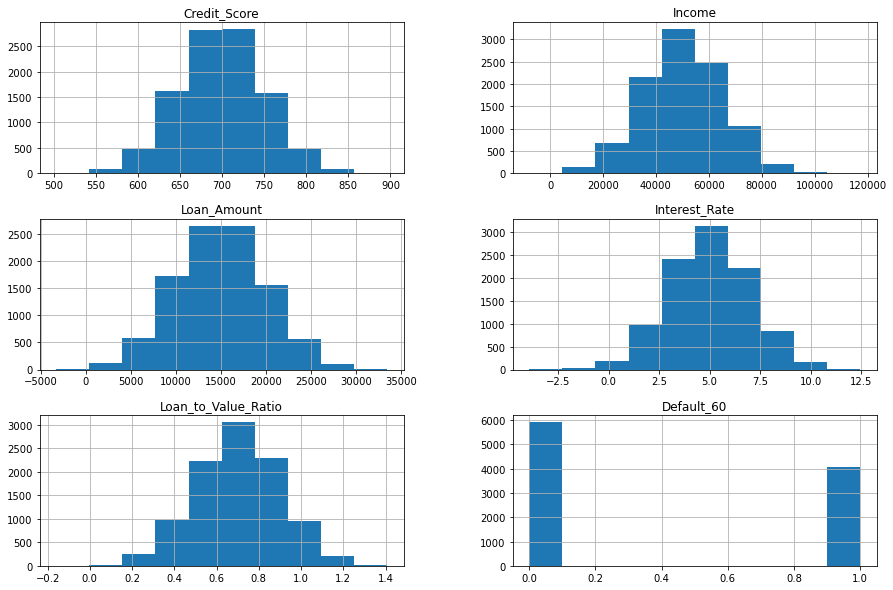

In [8]:
df.hist(figsize=(15,10))
#Podemos apreciar la distribución normal de nuestras variables numericas en los histogramas. 
#Por ende utilizaremos el modulo de "limpieza.robustoutliers"
#Dicho metodo es de rango intercuantil, modificando el umbral a 3.5.

In [9]:
Outliers.quantileoutlier(df,'Credit_Score',1.5)

179     836
209     892
262     537
478     853
646     565
       ... 
8726    857
9258    838
9573    562
9606    559
9770    503
Name: Credit_Score, Length: 83, dtype: int64

In [10]:
Outliers.quantileoutlier(df,'Income',1.5)

127      9163
185     93711
217      8893
543      7840
581     92020
        ...  
9490    93954
9584    91788
9674    -7845
9852      -23
9962     6859
Name: Income, Length: 83, dtype: int64

In [11]:
Outliers.quantileoutlier(df,'Loan_to_Value_Ratio',3.5)

Series([], Name: Loan_to_Value_Ratio, dtype: float64)

In [12]:
Outliers.quantileoutlier(df,'Loan_Amount',2.5)

Series([], Name: Loan_Amount, dtype: int64)

In [13]:
Outliers.quantileoutlier(df,'Interest_Rate',1.5)

14      -1.186451
224     -2.065636
482     11.316147
496     -0.824320
511     10.501897
          ...    
9499    -0.697371
9527    -0.817725
9575    10.703924
9616    -1.896086
9838    11.591809
Name: Interest_Rate, Length: 63, dtype: float64

In [14]:
limpieza.categorize(df)

,Credit_Score,Income,Loan_Amount,Interest_Rate,Loan_to_Value_Ratio,Employment_Status,Education_Level,Marital_Status,Loan_Purpose,Region,Default_60
0,724,39822,16741,1.038856,0.605628,1,1,1,1,1,0
1,693,45417,16416,2.890029,0.902540,2,2,1,2,2,0
2,732,41039,10317,3.825943,0.660363,3,1,2,2,3,0
3,776,51656,17897,5.299338,0.718114,1,3,1,3,1,1
4,688,67957,7549,7.048325,0.843478,3,2,2,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,765,55817,12113,7.239302,0.711360,3,2,1,3,3,1
9996,600,70660,22223,5.530068,0.695015,1,3,2,4,3,0
9997,664,55675,12493,6.233002,0.800017,2,1,1,4,1,0
9998,724,75702,5538,6.629247,0.753043,3,3,4,3,1,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Credit_Score         10000 non-null  int64  
 1   Income               10000 non-null  int64  
 2   Loan_Amount          10000 non-null  int64  
 3   Interest_Rate        10000 non-null  float64
 4   Loan_to_Value_Ratio  10000 non-null  float64
 5   Employment_Status    10000 non-null  object 
 6   Education_Level      10000 non-null  object 
 7   Marital_Status       10000 non-null  object 
 8   Loan_Purpose         10000 non-null  object 
 9   Region               10000 non-null  object 
 10  Default_60           10000 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 859.5+ KB


[<AxesSubplot:ylabel='Employment_Status'>,
 <AxesSubplot:ylabel='Education_Level'>,
 <AxesSubplot:ylabel='Marital_Status'>,
 <AxesSubplot:ylabel='Loan_Purpose'>,
 <AxesSubplot:ylabel='Region'>]

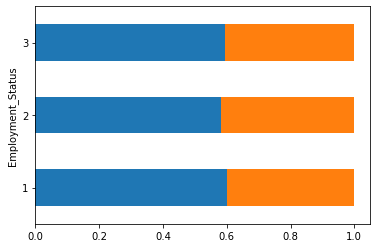

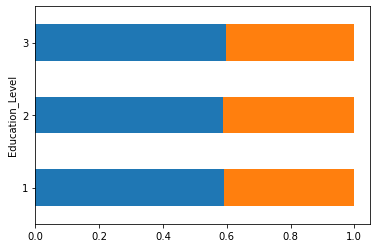

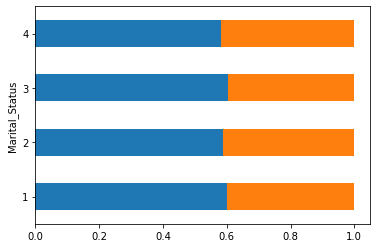

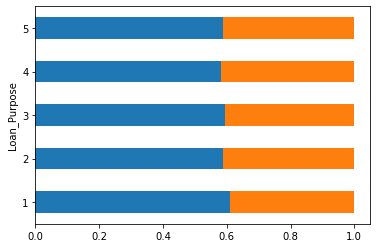

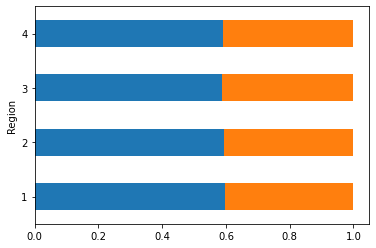

In [16]:
analisis_bi_multi.contingency(df,df['Default_60'])

In [17]:
analisis_bi_multi.correlation(df,'Default_60')

,Correlation,P-Value
Credit_Score,0.004798,0.631376
Income,0.006696,0.503132
Loan_Amount,0.015790,0.114362
Interest_Rate,-0.010920,0.274861
Loan_to_Value_Ratio,0.000361,0.971237
Employment_Status,0.005708,0.568204
Education_Level,-0.003960,0.692167
Marital_Status,0.009184,0.358462
Loan_Purpose,0.014081,0.159136
Region,0.006070,0.543876


In [18]:
analisis_bi_multi.varclus(df)

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,Loan_Amount,1.0,0.000719,2.222043e-16
1,1,Marital_Status,1.0,0.000328,2.221174e-16
2,2,Default_60,1.0,0.000275,0.000000e+00
3,3,Employment_Status,1.0,0.000177,0.000000e+00
4,4,Region,1.0,0.000273,0.000000e+00
5,5,Loan_to_Value_Ratio,1.0,0.000163,0.000000e+00
6,6,Interest_Rate,1.0,0.000199,0.000000e+00
7,7,Loan_Purpose,1.0,0.000199,0.000000e+00
8,8,Education_Level,1.0,0.000325,0.000000e+00
9,9,Credit_Score,1.0,0.000715,0.000000e+00


In [19]:
analisis_bi_multi.woenum(df,df['Default_60'])

{'Credit_Score':                      Bin  Count  Count (%)  Non-event  Event  Event rate  \
 0         (-inf, 670.50)   2818     0.2818       1651   1167    0.414123   
 1       [670.50, 709.50)   2982     0.2982       1796   1186    0.397720   
 2       [709.50, 716.50)    557     0.0557        356    201    0.360862   
 3       [716.50, 728.50)    848     0.0848        499    349    0.411557   
 4       [728.50, 753.50)   1385     0.1385        805    580    0.418773   
 5          [753.50, inf)   1410     0.1410        816    594    0.421277   
 6                Special      0     0.0000          0      0    0.000000   
 7                Missing      0     0.0000          0      0    0.000000   
 Totals                    10000     1.0000       5923   4077    0.407700   
 
              WoE        IV        JS  
 0      -0.026537  0.000199  0.000025  
 1       0.041494  0.000511  0.000064  
 2       0.198144  0.002141  0.000267  
 3      -0.015947  0.000022  0.000003  
 4      -0.0

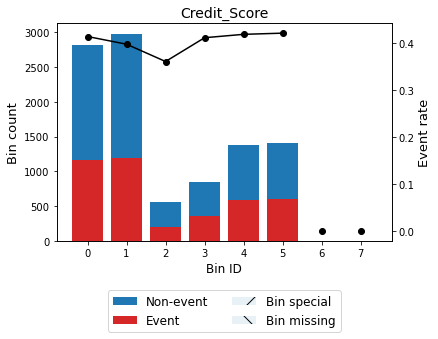

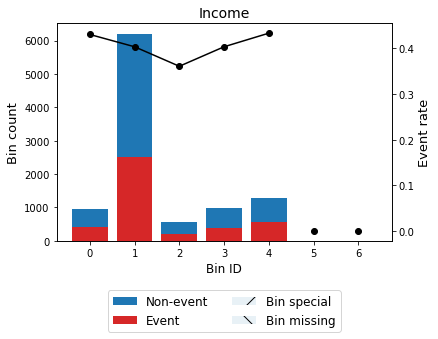

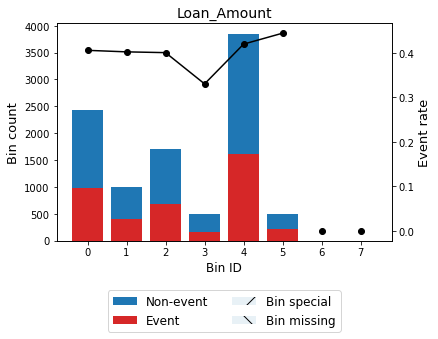

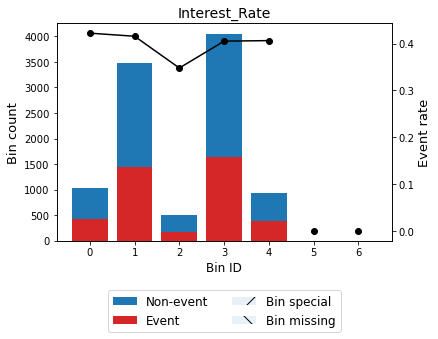

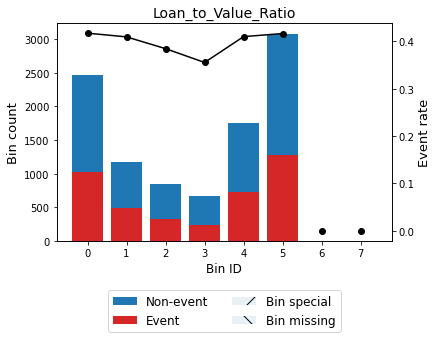

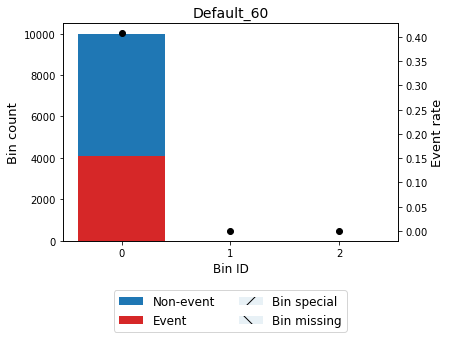

[None, None, None, None, None, None]

In [20]:
analisis_bi_multi.woegrafnum(df,df['Default_60'])

In [21]:
analisis_bi_multi.woecat(df,df['Default_60'])

{'Employment_Status':             Bin  Count  Count (%)  Non-event  Event  Event rate       WoE  \
 0           [1]   3333     0.3333       2004   1329    0.398740  0.037237   
 1           [3]   3292     0.3292       1957   1335    0.405529     0.009   
 2           [2]   3375     0.3375       1962   1413    0.418667 -0.045232   
 3       Special      0     0.0000          0      0    0.000000       0.0   
 4       Missing      0     0.0000          0      0    0.000000       0.0   
 Totals           10000     1.0000       5923   4077    0.407700             
 
               IV        JS  
 0       0.000461  0.000058  
 1       0.000027  0.000003  
 2       0.000693  0.000087  
 3       0.000000  0.000000  
 4       0.000000  0.000000  
 Totals  0.001180  0.000148  ,
 'Education_Level':             Bin  Count  Count (%)  Non-event  Event  Event rate       WoE  \
 0           [3]   3312     0.3312       1976   1336    0.403382  0.017913   
 1           [1]   3410     0.3410       2018

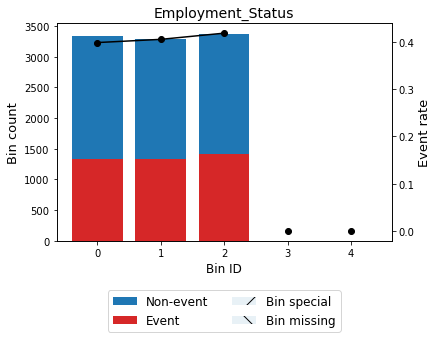

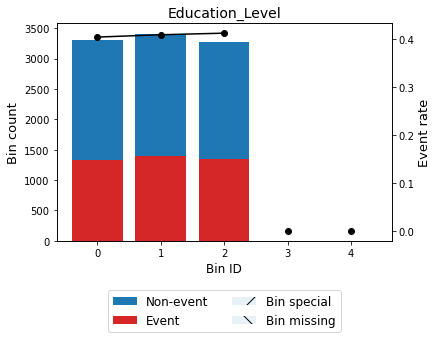

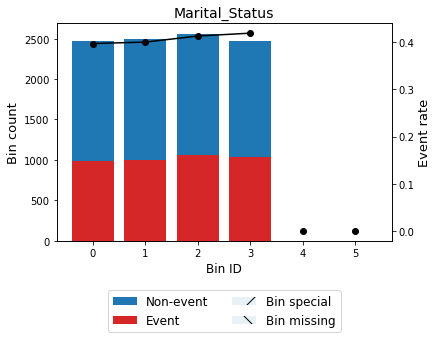

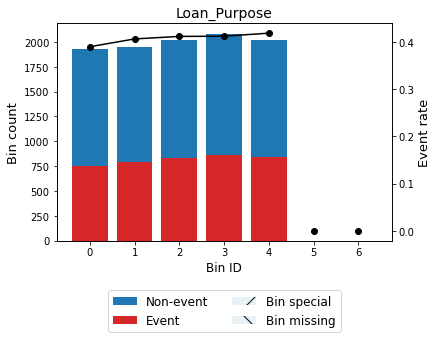

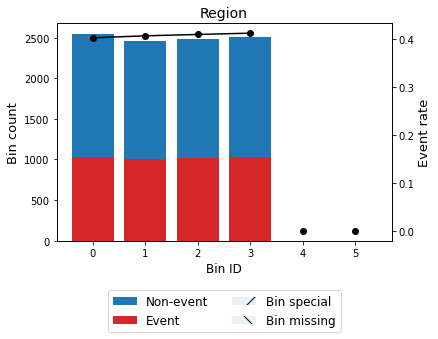

[None, None, None, None, None]

In [22]:
analisis_bi_multi.woegrafcat(df,df['Default_60'])

In [23]:
analisis_bi_multi.olstest(df.astype('int'),'Default_60')

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:1889: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


{'Credit_Score': <class 'statsmodels.stats.contrast.WaldTestResults'>
                               F                     P>F  df constraint  df denom
 const      [[33.9377530775937]]  5.8660718135257165e-09              1    9998.0
 x      [[0.012055628179502334]]      0.9125716820053653              1    9998.0,
 'Income': <class 'statsmodels.stats.contrast.WaldTestResults'>
                              F                      P>F  df constraint  df denom
 const    [[543.1855239790001]]  4.8584889746973015e-117              1    9998.0
 x      [[0.23484087691082275]]       0.6279680088578079              1    9998.0,
 'Loan_Amount': <class 'statsmodels.stats.contrast.WaldTestResults'>
                            F                      P>F  df constraint  df denom
 const  [[603.0534726896359]]  2.3427420531133802e-129              1    9998.0
 x      [[2.751986531981103]]      0.09716504373568821              1    9998.0,
 'Interest_Rate': <class 'statsmodels.stats.contrast.WaldTestR